In [538]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [539]:
df = pd.read_csv('/data/risk_precision/magRiskData2.csv')
df['presentation'] = df['exptype'].astype(int).map({1:'coins', 2:'symbolic', 3:'coins'})
df['type'] = df['exptype'].map({1:'magnitude', 2:'risk', 3:'risk'})
df.drop(columns='exptype', inplace=True)

df = df.rename(columns={"subcode":'subject'})

df = df.set_index(['subject', 'run', 'type', 'presentation'])

df['choice'] = df.choice.map({-2:np.nan, 2:np.nan, -1:1, 1:0})
df['frac'] = df['prob_bet'] / df['sure_bet']
df['log(frac)'] = np.log(df['frac'])

In [540]:
d = df.xs('risk', 0, 'type').xs('coins', 0, 'presentation')

df = df[~df['choice'].isnull()]

In [541]:
import seaborn as sns

In [542]:
import statsmodels.api as sm

In [543]:
subject = 2

In [544]:
def get_prob_pars(d):
    X = np.hstack((np.ones((len(d), 1)), d['log(frac)'].values[:, np.newaxis]))
    model = sm.Probit(d['choice'], X)
    
    try:
        return model.fit().params
    except Exception as e:
        return pd.Series([])
    

In [545]:
pars = df[~df['choice'].isnull()].groupby(['subject', 'type', 'presentation']).apply(get_prob_pars).unstack()
pars

Optimization terminated successfully.
         Current function value: 0.217972
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.307563
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.155554
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.220368
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.250357
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.158654
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.275657
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.325057
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.306069
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300431
  

Optimization terminated successfully.
         Current function value: 0.288101
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.153770
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.214728
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.335053
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.170843
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.235761
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.370723
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.433614
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.277911
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.366215
  

/Users/gdehol/miniconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


const        x1
subject type      presentation                    
1       magnitude coins        -0.006413  3.489288
        risk      coins        -2.723712  3.531554
                  symbolic     -4.220355  7.573739
2       magnitude coins        -0.205324  3.300072
        risk      coins        -2.455080  4.567609
...                                  ...       ...
63      risk      coins        -2.877527  3.003708
                  symbolic     -4.847453  4.905931
64      magnitude coins         0.180339  2.856383
        risk      coins        -4.950594  3.390953
                  symbolic     -2.730623  1.776081

[191 rows x 2 columns]

[(5, -10)]

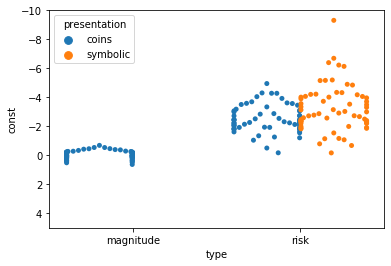

In [546]:
fac = sns.swarmplot('type', 'const', 'presentation', data=pars.reset_index(), dodge=True)
fac.set(ylim=(5, -10))

[(0, 10)]

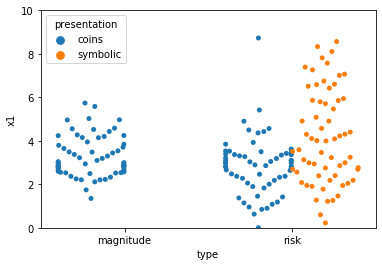

In [547]:
fac = sns.swarmplot('type', 'x1', 'presentation', data=pars.reset_index(), dodge=True)
fac.set(ylim=(0, 10))

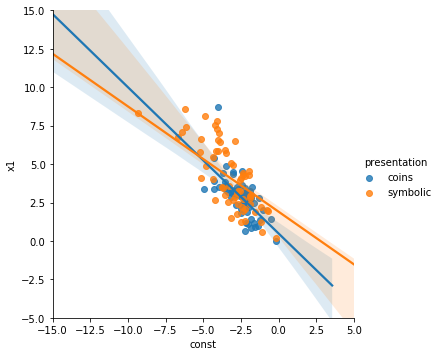

In [548]:
fac = sns.lmplot('const', 'x1', pars.xs('risk', 0, 'type').reset_index(), 'presentation')
fac.set(xlim=(-15, 5), ylim=(-5, 15))

In [550]:
import scipy.stats as ss

In [551]:
p = pars.iloc[0]

In [552]:
p.dot(np.array([[1, 2], [3, 4]]).T)

array([ 6.97216302, 13.93791287])

In [553]:
pars.xs('risk',0,'type').xs('coins', 0, 'presentation').mean()

const   -2.493546
x1       2.863674
dtype: float64

In [554]:
pars.xs('risk',0,'type').xs('coins', 0, 'presentation').std()

const    0.928975
x1       1.318474
dtype: float64

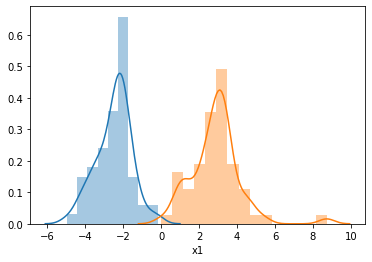

In [555]:
sns.distplot(pars.xs('risk',0,'type').xs('coins', 0, 'presentation')['const'])
sns.distplot(pars.xs('risk',0,'type').xs('coins', 0, 'presentation')['x1'])

In [556]:
def plot_pars(pars, x_range=(-1, 2), *args, **kwargs):
    
    x = np.linspace(x_range[0], x_range[1], 100)
    
    X = np.hstack((np.ones((100, 1)), x[:, np.newaxis]))
    
    y_ = pars.dot(X.T)
    
    y = ss.norm.cdf(y_)
    
    return plt.plot(x, y, *args, **kwargs)



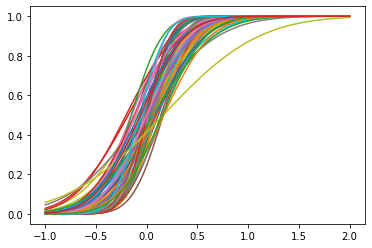

In [557]:
for ix, row in pars.xs('magnitude',0,'type').iterrows():
    plot_pars(row)

In [558]:
h = np.arange(9)
fractions = 2**(h/4)

In [561]:
fractions

array([1.        , 1.18920712, 1.41421356, 1.68179283, 2.        ,
       2.37841423, 2.82842712, 3.36358566, 4.        ])

In [563]:
h = np.arange(1, 9)
fractions = 2**(h/4)

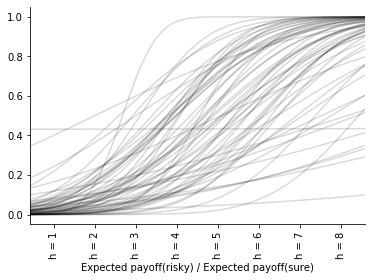

In [579]:
for ix, row in pars.xs('risk',0,'type').xs('coins', 0, 'presentation').iterrows():
    plot_pars(row, alpha=0.15, c='k')
    
# plt.axvline(np.log(1./.55), c='r')
plt.xticks(np.log(fractions), [f'h = {h}' for h in range(1, 9)], rotation='vertical')



plt.xlim(np.log(fractions[0]) - .1, np.log(fractions[-1]) + .1)
plt.xlabel('Expected payoff(risky) / Expected payoff(sure)')
sns.despine()

/Users/gdehol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


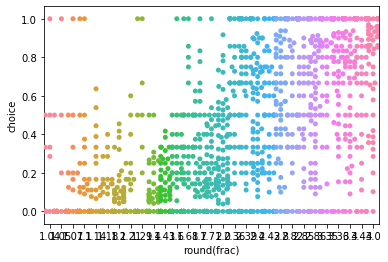

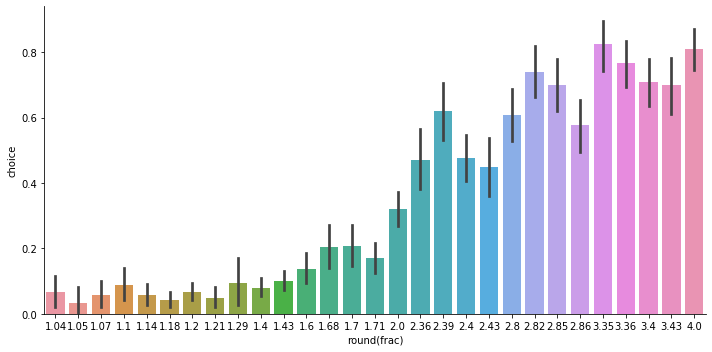

In [393]:
df['round(frac)'] = np.round(df['frac'], 2)


tmp = df.xs('coins', 0, 'presentation').xs('risk', 0, 'type').groupby(['round(frac)', 'subject']).mean()

sns.swarmplot('round(frac)', 'choice', data=tmp.reset_index())

sns.catplot('round(frac)', 'choice', data=tmp.reset_index(), kind='bar', aspect=2.)

/Users/gdehol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


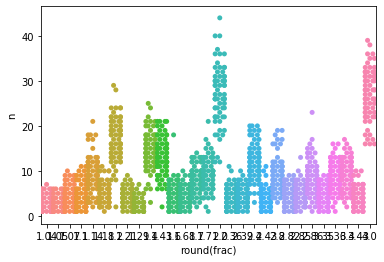

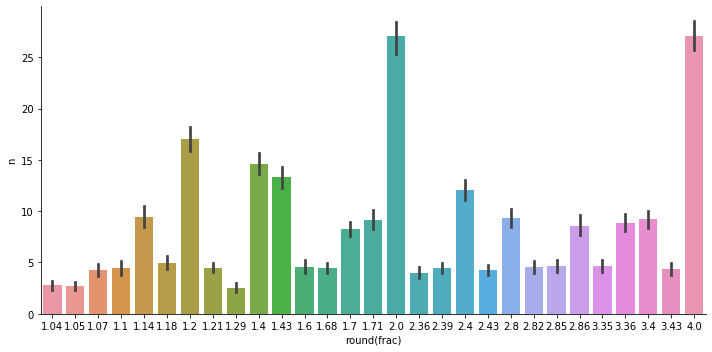

In [395]:
df['round(frac)'] = np.round(df['frac'], 2)


tmp = df.xs('coins', 0, 'presentation').xs('risk', 0, 'type').groupby(['round(frac)', 'subject']).size().to_frame('n')

sns.swarmplot('round(frac)', 'n', data=tmp.reset_index())

sns.catplot('round(frac)', 'n', data=tmp.reset_index(), kind='bar', aspect=2.)

In [399]:
df.xs('coins', 0, 'presentation').xs('risk', 0, 'type').groupby(['sure_bet', 'prob_bet']).size()

sure_bet  prob_bet
5         6           391
          7           382
          8           290
          10          258
          12          258
          14          324
          17          288
          20          305
7         8           456
          9           115
          10          297
          12          276
          14          269
          17          265
          20          300
          24          265
          28          269
10        11          124
          12          422
          14          273
          17          258
          20          326
          24          262
          28          273
          34          304
          40          275
14        15          143
          16          147
          17          277
          20          273
          24          302
          28          304
          33          255
          40          250
          47          287
          56          291
20        21          140
          22       

In [406]:
h = np.arange(9)
fractions = 2**(h/4)

In [417]:
d = df.xs('risk',0,'type').xs('coins', 0, 'presentation')

In [418]:
d['nearest_fraction'] = fractions[np.abs(d['frac'].values[:, np.newaxis] - fractions[np.newaxis, :]).argmin(1)]

In [427]:
d['nearest_fraction'] = d['nearest_fraction'].map(dict(zip(fractions, ['2^{}/4'.format(n) for n in range(9)])))

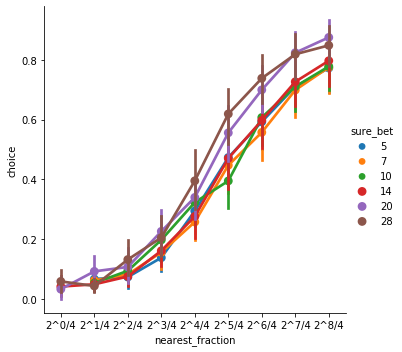

In [437]:
sns.catplot('nearest_fraction', 'choice', data=d.groupby(['subject', 'nearest_fraction', 'sure_bet']).mean().reset_index(), 
            hue='sure_bet', kind='point')

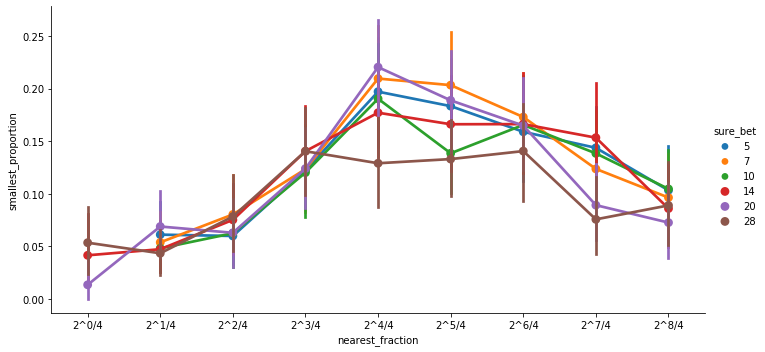

In [450]:
tmp = d.groupby(['subject', 'nearest_fraction', 'sure_bet']).mean()['choice']

tmp = tmp.map(lambda x: min(x, 1-x)).to_frame('smallest_proportion')

sns.catplot('nearest_fraction', 'smallest_proportion', 
            data=tmp.reset_index(), 
            hue='sure_bet', kind='point', aspect=2.)

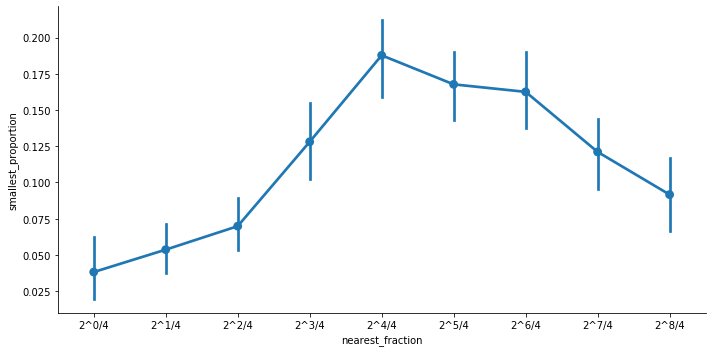

In [460]:
tmp = d.groupby(['subject', 'nearest_fraction', 'sure_bet']).mean()['choice']

tmp = tmp.map(lambda x: min(x, 1-x)).to_frame('smallest_proportion')

sns.catplot('nearest_fraction', 'smallest_proportion', 
            data=tmp.groupby(['subject', 'nearest_fraction']).mean().reset_index(), kind='point', aspect=2.)

In [464]:
tmp.head()

smallest_proportion
subject nearest_fraction sure_bet                     
1       2^0/4            14                        0.0
                         20                        0.0
                         28                        0.0
        2^1/4            5                         0.0
                         7                         0.1

(smallest_proportion    0.117948
 dtype: float64,
 smallest_proportion    0.482738
 dtype: float64)

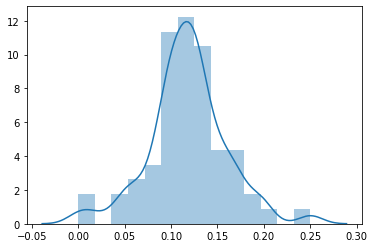

In [485]:
sns.distplot(tmp.groupby(['subject']).mean())

tmp.groupby(['subject']).mean().mean(), tmp.groupby(['subject']).max().mean()

(smallest_proportion    0.161313
 dtype: float64,
 smallest_proportion    0.473909
 dtype: float64)

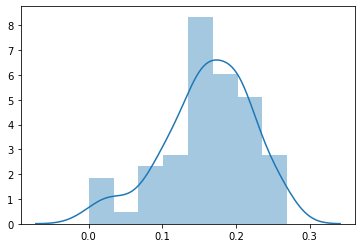

In [483]:
ix = pd.IndexSlice
sns.distplot(tmp.loc[ix[:, ['2^3/4', '2^4/4', '2^5/4', '2^6/4']], :].groupby(['subject']).mean())

tmp.loc[ix[:, ['2^3/4', '2^4/4', '2^5/4', '2^6/4']], :].groupby(['subject']).mean().mean(), tmp.loc[ix[:, ['2^3/4', '2^4/4', '2^5/4', '2^6/4']], :].groupby(['subject']).max().mean()

(smallest_proportion    0.159538
 dtype: float64,
 smallest_proportion    0.471825
 dtype: float64)

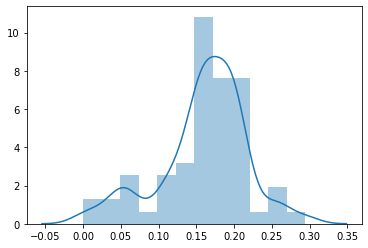

In [484]:
ix = pd.IndexSlice
sns.distplot(tmp.loc[ix[:, ['2^4/4', '2^5/4', '2^6/4', '2^7/4']], :].groupby(['subject']).mean())

tmp.loc[ix[:, ['2^4/4', '2^5/4', '2^6/4', '2^7/4']], :].groupby(['subject']).mean().mean(), tmp.loc[ix[:, ['2^4/4', '2^5/4', '2^6/4', '2^7/4']], :].groupby(['subject']).max().mean()

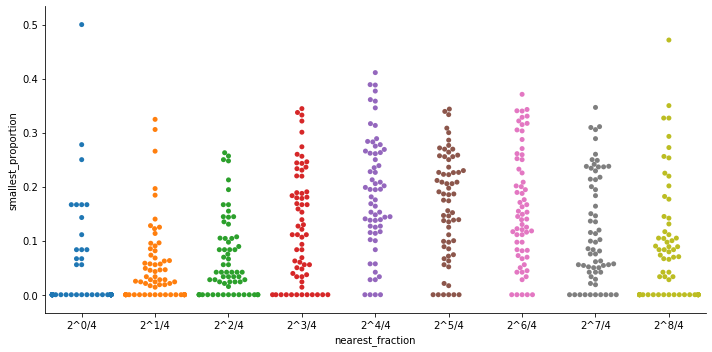

In [456]:
tmp = d.groupby(['subject', 'nearest_fraction', 'sure_bet']).mean()['choice']

tmp = tmp.map(lambda x: min(x, 1-x)).to_frame('smallest_proportion')

sns.catplot('nearest_fraction', 'smallest_proportion', 
            data=tmp.groupby(['subject', 'nearest_fraction']).mean().reset_index(), kind='swarm', aspect=2.)